In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [106]:
inv = pd.read_csv('inventories-dummy.csv')
cost = pd.read_csv('cost-dummy.csv')

In [107]:
cost_melt = pd.melt(cost,
                     id_vars=['year', 'scenario', 'coarse grinding location', 'turbine to recycle facility distance'],
                     value_vars=['landfilling cost', 'recycling to clinker cost', 'recycling to raw material cost'],
                     var_name='pathway', value_name='cost')

cost_melt['turbine to cement plant distance']=204.0

cost_melt.head()

,year,scenario,coarse grinding location,turbine to recycle facility distance,pathway,cost,turbine to cement plant distance
0,2011.00,bau,onsite,9.0,landfilling cost,1194.217727,204.0
1,2011.25,bau,onsite,9.0,landfilling cost,1218.325272,204.0
2,2011.50,bau,onsite,9.0,landfilling cost,1242.844971,204.0
3,2011.75,bau,onsite,9.0,landfilling cost,1267.776846,204.0
4,2012.00,bau,onsite,9.0,landfilling cost,1293.120918,204.0


In [108]:
# rename process column
inv['process'].iloc[inv['process']=='coarse grinding'] = 'recycle to clinker'
inv['process'].iloc[inv['process']=='fine grinding'] = 'recycle to raw material'

C:\Users\rhanes\AppData\Local\Continuum\anaconda3\envs\celavi\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [111]:
inv.head()

,Unnamed: 0,year,material,cumul_mass,mass,process,scenario,coarse grinding location,distance to recycling facility,distance to cement plant
0,0,2000.00,glass fiber reinforced polymer,-0.0,NaN,manufacturing,bau,onsite,9.0,187.0
1,1,2000.25,glass fiber reinforced polymer,-0.0,0.0,manufacturing,bau,onsite,9.0,187.0
2,2,2000.50,glass fiber reinforced polymer,-0.0,0.0,manufacturing,bau,onsite,9.0,187.0
3,3,2000.75,glass fiber reinforced polymer,-0.0,0.0,manufacturing,bau,onsite,9.0,187.0
4,4,2001.00,glass fiber reinforced polymer,33189.0,33189.0,manufacturing,bau,onsite,9.0,187.0


In [112]:
# pathway use over time
# material = 'glass fiber reinforced polymer'
# EXCLUDE scenario = 'mc'
# coarse grinding location = 'onsite'
# distance to recycling facility = 9.0
# distance to cement plant = 187.0

use_dat = inv.loc[(inv['material']=='glass fiber reinforced polymer') & (inv['process']!='manufacturing') &
                 (inv['coarse grinding location']=='onsite') & (inv['distance to recycling facility']==9.0) &
                 (inv['distance to cement plant']==187.0)]

bau_use_dat = use_dat.loc[use_dat['scenario']=='bau']
hc_use_dat = use_dat.loc[use_dat['scenario']=='hc']

In [113]:
cost_dat = cost_melt.loc[(cost_melt['coarse grinding location']=='onsite') & 
                         (cost_melt['turbine to recycle facility distance']==9.0) &
                        (cost_melt['turbine to cement plant distance']==204.0)]


In [114]:
bau_cost_dat = cost_dat.loc[cost_dat['scenario']=='bau']
hc_cost_dat = cost_dat.loc[cost_dat['scenario']=='hc']

In [117]:
bau_use_dat.head()

,Unnamed: 0,year,material,cumul_mass,mass,process,scenario,coarse grinding location,distance to recycling facility,distance to cement plant
402,402,2000.00,glass fiber reinforced polymer,0.0,NaN,recycle to clinker,bau,onsite,9.0,187.0
403,403,2000.25,glass fiber reinforced polymer,0.0,0.0,recycle to clinker,bau,onsite,9.0,187.0
404,404,2000.50,glass fiber reinforced polymer,0.0,0.0,recycle to clinker,bau,onsite,9.0,187.0
405,405,2000.75,glass fiber reinforced polymer,0.0,0.0,recycle to clinker,bau,onsite,9.0,187.0
406,406,2001.00,glass fiber reinforced polymer,0.0,0.0,recycle to clinker,bau,onsite,9.0,187.0


In [116]:
bau_cost_dat.head()

,year,scenario,coarse grinding location,turbine to recycle facility distance,pathway,cost,turbine to cement plant distance
0,2011.00,bau,onsite,9.0,landfilling cost,1194.217727,204.0
1,2011.25,bau,onsite,9.0,landfilling cost,1218.325272,204.0
2,2011.50,bau,onsite,9.0,landfilling cost,1242.844971,204.0
3,2011.75,bau,onsite,9.0,landfilling cost,1267.776846,204.0
4,2012.00,bau,onsite,9.0,landfilling cost,1293.120918,204.0


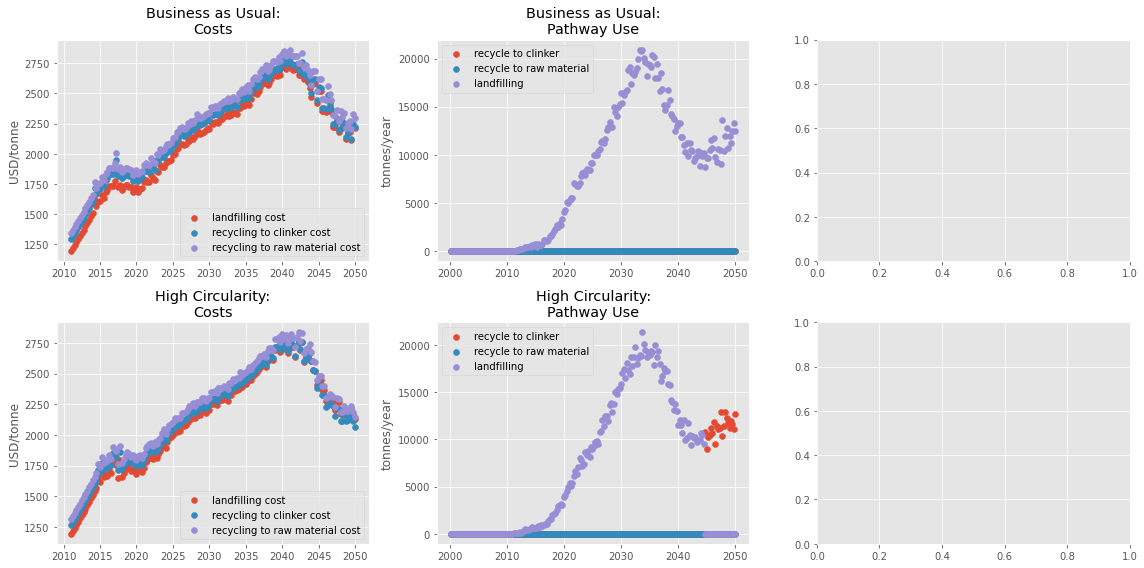

In [129]:
# facet column = scenario (2 rows)
fig, ((baucost, baupath, bauimp), (hccost, hcpath, hcimp)) = plt.subplots(2, 3, figsize=(16,8))
# x = year
# y = cumul_mass
# colour = pathway

for i in bau_cost_dat['pathway'].unique():
    baucost.scatter(bau_cost_dat.loc[bau_cost_dat['pathway']==i]['year'], bau_cost_dat.loc[bau_cost_dat['pathway']==i]['cost'],
                   label=i)

baucost.legend()
baucost.set_ylabel("USD/tonne")
baucost.set_title("Business as Usual:\nCosts")

for i in bau_use_dat['process'].unique():
    baupath.scatter(bau_use_dat.loc[bau_use_dat['process']==i]['year'], bau_use_dat.loc[bau_use_dat['process']==i]['mass'],
                label=i)

baupath.legend()
baupath.set_ylabel('tonnes/year')
baupath.set_title('Business as Usual:\nPathway Use')

for j in hc_cost_dat['pathway'].unique():
    hccost.scatter(hc_cost_dat.loc[hc_cost_dat['pathway']==j]['year'], hc_cost_dat.loc[hc_cost_dat['pathway']==j]['cost'],
                  label=j)

hccost.legend()
hccost.set_ylabel("USD/tonne")
hccost.set_title("High Circularity:\nCosts")

for j in hc_use_dat['process'].unique():
    hcpath.scatter(hc_use_dat.loc[hc_use_dat['process']==j]['year'], hc_use_dat.loc[hc_use_dat['process']==j]['mass'],
                   label=j)

hcpath.legend()
hcpath.set_ylabel('tonnes/year')
hcpath.set_title('High Circularity:\nPathway Use')

plt.tight_layout()

In [130]:
fig.savefig('results-dummy.png', dpi=220)